<a href="https://colab.research.google.com/github/RahulBhasin/Analyzing-Profitability-on-Rentals-using-AirbnB-and-Zillow-datasets/blob/master/Analyzing_Profitability_using_Airbnb_and_Zillow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Profitability on Rentals using Air BnB and Zillow datasets**

**In this python notebook, I performed data-preprocessing steps to prepare dataset for Tableau Data Visualizations.**


In [0]:
#Use below commands to install missing packages
# %pip install --user missingno
# %pip install --user pandas_profiling

In [0]:
# Importing Python libraries
import pandas as pd
import numpy as np
import missingno as msno # For checking missing values 
import pandas_profiling # For profiling of each variable
import seaborn as sns # For data Visualizations

import matplotlib.pyplot as plt
%matplotlib inline

import warnings  
warnings.filterwarnings('ignore')

pd.set_option('display.min_rows',150)
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',150)

In [0]:
# Reading Zillow dataset and displaying its data
zillow_v1=pd.read_csv('Zip_Zhvi_2bedroom.csv')
zillow_v1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,...,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,174600.0,177600.0,180100.0,182300.0,184400.0,186300.0,187600.0,189400.0,190300.0,189700.0,189800.0,191900.0,194500.0,195500.0,196000.0,196900.0,198900.0,201400.0,204600.0,207900.0,211800.0,214600.0,216000.0,217500.0,220200.0,222800.0,226200.0,229600.0,232400.0,234400.0,236300.0,238300.0,241800.0,246100.0,249500.0,251300.0,253200.0,255700.0,259200.0,263100.0,266600.0,269500.0,272800.0,275500.0,278800.0,283400.0,288600.0,291300.0,292400.0,294600.0,297100.0,298200.0,299800.0,302000.0,304200.0,307900.0,311000.0,311400.0,...,309800.0,305700.0,301800.0,299500.0,299900.0,301100.0,300300.0,298900.0,298500.0,298500.0,297000.0,296800.0,298700.0,299600.0,300700.0,303900.0,306800.0,307500.0,308500.0,310000.0,310800.0,311200.0,313000.0,315800.0,319000.0,323400.0,327500.0,330000.0,331800,334500,336000,335700,335400,336300,338800,342400,344400,344000,343900,345100,346100,346900,348000,349700,351200,351700,350700,350400,352000,354300,355900,356500,355200,353800,353700,354600,356200,357800,358200.0,358500.0,360300.0,362400.0,363700,365200,367100,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1384700.0,1380900.0,1367900.0,1365400.0,1375100.0,1380400.0,1377000.0,1375100.0,1379000.0,1395200.0,1414500.0,1419000.0,1403100.0,1383200.0,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,14

In [0]:
# Checking missing values, unique values and data types in Zillow dataset
def basic_details(df):
    b = pd.DataFrame()
    b['# Missing values'] = df.isnull().sum()
    b['% Missing values'] = round((df.isnull().sum()/df.shape[0])*100,2)
    b['# Unique values'] = df.nunique()
    b['Data type'] = df.dtypes
    return b
basic_details(zillow_v1)

,# Missing values,% Missing values,# Unique values,Data type
RegionID,0,0.00,8946,int64
RegionName,0,0.00,8946,int64
City,0,0.00,4684,object
State,0,0.00,48,object
Metro,250,2.79,466,object
CountyName,0,0.00,722,object
SizeRank,0,0.00,8946,int64
1996-04,2662,29.76,1581,float64
1996-05,2582,28.86,1567,float64
1996-06,2582,28.86,1564,float64


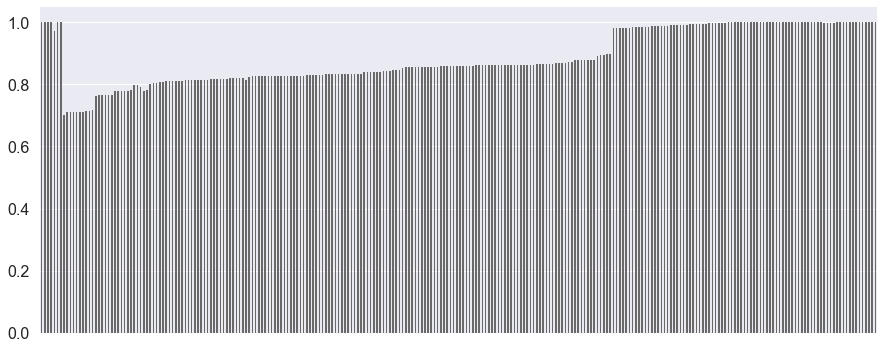

In [0]:
# Checking missing values using data visualization
p=msno.bar(zillow_v1, figsize=(15, 6))

In [0]:
# Checking if there are duplicate rows in data
zillow_v1[zillow_v1.duplicated() == True]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,...,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06


In [0]:
# Displaying summary statistics of Zillow dataset
zillow_v1.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,...,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,8946.000000,8946.000000,8946.000000,6284.000000,6364.000000,6364.000000,6369.000000,6370.000000,6370.000000,6370.000000,6380.000000,6380.000000,6404.000000,6833.000000,6853.000000,6853.000000,6853.000000,6855.000000,6855.000000,6952.000000,6955.000000,6955.000000,6958.000000,6962.000000,6979.000000,7124.000000,7125.000000,7081.000000,6973.000000,6985.000000,7170.000000,7204.000000,7204.000000,7216.000000,7237.000000,7239.000000,7240.000000,7257.000000,7258.000000,7258.000000,7261.000000,7271.000000,7271.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7313.000000,7313.000000,7315.000000,7315.000000,7315.000000,7.320000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.267000e+03,7.366000e+03,7.393000e+03,7.394000e+03,7.394000e+03,7.395000e+03,7.395000e+03,7.400000e+03,7.400000e+03,7.400000e+03,7.401000e+03,7.401000e+03,7.401000e+03,7.408000e+03,7.408000e+03,...,8.797000e+03,8.797000e+03,8.799000e+03,8.812000e+03,8.825000e+03,8.826000e+03,8.826000e+03,8.826000e+03,8.828000e+03,8.838000e+03,8.853000e+03,8.855000e+03,8.855000e+03,8.855000e+03,8.859000e+03,8.862000e+03,8.879000e+03,8.880000e+03,8.881000e+03,8.881000e+03,8.881000e+03,8.882000e+03,8.915000e+03,8.920000e+03,8.925000e+03,8.925000e+03,8.926000e+03,8.926000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.928000e+03,8.928000e+03,8.928000e+03,8.928000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.943000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03
mean,80671.285938,47494.449027,4473.500000,93754.057925,93616.043369,93642.630421,93609.734652,93646.357928,93722.339089,93849.262166,94025.501567,94291.630094,94557.229856,95011.868872,95463.942799,95714.110608,95972.946155,96269.905179,96619.649891,96947.180667,97364.816679,97776.276060,98262.762288,98803.820741,99406.118355,99959.446940,100517.361404,100459.723203,100066.355944,100452.083035,102100.237099,102587.756802,103051.415880,103834.950111,104544.300124,105096.118248,105706.616022,106298.897616,106903.857812,107532.212731,108213.221319,109019.777197,109737.890249,110479.078695,111199.369345,111979.462572,112809.555799,113676.213326,114656.320263,115751.264871,116765.198961,117732.699932,118747.587150,119774.039645,1.207899e+05,1.218565e+05,1.227887e+05,1.237425e+05,1.247254e+05,1.257094e+05,1.271784e+05,1.277812e+05,1.287443e+05,1.296831e+05,1.305272e+05,1.31343

In [0]:
# Calculating year-wise historical median price
years=['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'
       ,'2012','2013','2014','2015','2016','2017']
months=['01','02','03','04','05','06','07','08','09','10','11','12']
for y in years:
    year_month=[]
    for m in months:
        #print(y+'-'+m)
        year_month.append(y+'-'+m)
    #print(year_month)
    zillow_v1['Median-'+y]=zillow_v1.loc[:, zillow_v1.columns.isin(year_month)].median(axis=1)

In [0]:
# Keeping only required fields and displaying data
zillow_v2 = zillow_v1[['RegionID','RegionName','City','State','Metro','CountyName','SizeRank','Median-1996',
                       'Median-1997','Median-1998','Median-1999','Median-2000','Median-2001','Median-2002',
                       'Median-2003','Median-2004','Median-2005','Median-2006','Median-2007','Median-2008',
                       'Median-2009','Median-2010','Median-2011','Median-2012','Median-2013','Median-2014',
                       'Median-2015','Median-2016','Median-2017']]
zillow_v2['RegionName']=zillow_v2['RegionName'].astype(str)
zillow_v2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Median-1996,Median-1997,Median-1998,Median-1999,Median-2000,Median-2001,Median-2002,Median-2003,Median-2004,Median-2005,Median-2006,Median-2007,Median-2008,Median-2009,Median-2010,Median-2011,Median-2012,Median-2013,Median-2014,Median-2015,Median-2016,Median-2017
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0
1,84654,60657,Chicago,IL,Chicago,Cook,2,167200.0,185350.0,200150.0,233400.0,268050.0,300900.0,313700.0,333900.0,343850.0,359150.0,371000.0,378950.0,368650.0,342700.0,323300.0,301450.0,302300.0,328750.0,344750.0,354050.0,364450.0,381950.0
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1385550.0,1259000.0,1381750.0,1447850.0,1635850.0,1374950.0,1344550.0,1379700.0,1380450.0,1496400.0,1729600.0,1724050.0,1913000.0,1988700.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,193600.0,213500.0,233200.0,259350.0,296050.0,326950.0,342900.0,362550.0,371600.0,394650.0,404150.0,409150.0,395050.0,364400.0,342500.0,326500.0,323200.0,356250.0,374300.0,378050.0,396050.0,409450.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,60800.0,58250.0,57950.0,58600.0,59850.0,58100.0,56900.0,57850.0,63700.0,70100.0,77900.0,85650.0,85050.0,84900.0,83350.0,82750.0,82150.0,81800.0,81350.0,80950.0,82500.0,83800.0


In [0]:
# Data Profiling (Output to an HTML file)
profile = pandas_profiling.ProfileReport(zillow_v2[['RegionName','City','State','Metro','CountyName','Median-2017']])
profile.to_file(output_file="zillow_data_profiling.html")

In [0]:
# Reading AirBnB listings dataset and displaying it’s top 5 rows
listings_v1=pd.read_csv('listings.csv')
listings_v1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$35.00,1,730,1,1,730,730,1.0,730.0,3 weeks ago,t,30,60,90,365,2019-07-09,9,2,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,87%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",M

In [0]:
# Checking missing values, unique values and data types in AirBnB listings dataset
def basic_details(df):
    b = pd.DataFrame()
    b['# Missing values'] = df.isnull().sum()
    b['% Missing values'] = round((df.isnull().sum()/df.shape[0])*100,2)
    b['# Unique values'] = df.nunique()
    b['Data type'] = df.dtypes
    return b
basic_details(listings_v1)

,# Missing values,% Missing values,# Unique values,Data type
id,0,0.00,48895,int64
listing_url,0,0.00,48895,object
scrape_id,0,0.00,1,int64
last_scraped,0,0.00,2,object
name,16,0.03,47905,object
summary,2041,4.17,43805,object
space,14026,28.69,32170,object
description,781,1.60,46248,object
experiences_offered,0,0.00,1,object
neighborhood_overview,17506,35.80,26902,object


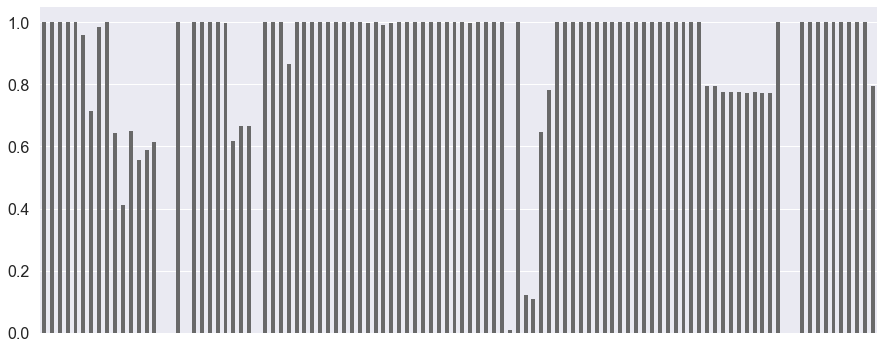

In [0]:
# Checking missing values using data visualization
p=msno.bar(listings_v1, figsize=(15, 6))

In [0]:
# Checking if there are duplicate rows in data
listings_v1[listings_v1.duplicated() == True]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [0]:
# Displaying summary statistics of AirBnB listings dataset
listings_v1.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.889500e+04,4.889500e+04,0.0,0.0,0.0,4.889500e+04,0.0,48874.000000,48874.000000,48895.000000,48895.000000,48895.000000,48839.000000,48873.000000,48855.000000,408.000000,48895.000000,48895.000000,4.889500e+04,48895.000000,48895.000000,4.889500e+04,4.889500e+04,48895.000000,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,37873.000000,37835.000000,37852.000000,37817.000000,37840.000000,37813.000000,37815.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000
mean,1.901714e+07,2.019071e+13,NaN,NaN,NaN,6.762001e+07,NaN,14.281745,14.281745,40.728949,-73.952170,2.857634,1.146461,1.178237,1.551898,708.120098,1.526475,7.029962,4.538598e+04,6.803681,16.973187,4.537559e+04,4.538564e+04,11.350208,4.537930e+04,6.931997,16.696738,27.120810,112.781327,23.274466,9.224767,93.926438,9.621303,9.279298,9.746119,9.757135,9.564674,9.399392,7.143982,5.559546,1.473811,0.110625,1.373221
std,1.098311e+07,5.449274e+00,NaN,NaN,NaN,7.861097e+07,NaN,84.151375,84.151375,0.054530,0.046157,1.891924,0.439449,0.755516,1.121969,573.520584,1.167344,20.510550,9.712591e+06,20.337150,149.779438,9.712591e+06,9.712591e+06,71.602389,9.712591e+06,9.907820,20.611863,31.805101,131.622289,44.550582,16.106229,8.577791,0.842331,1.084514,0.719957,0.724397,0.758343,0.907107,32.952519,32.149232,5.600618,0.986685,1.680442
min,2.539000e+03,2.019071e+13,NaN,NaN,NaN,2.438000e+03,NaN,0.000000,0.000000,40.499790,-74.244420,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.471945e+06,2.019071e+13,NaN,NaN,NaN,7.822033e+06,NaN,1.000000,1.000000,40.690100,-73.983070,2.000000,1.000000,1.000000,1.000000,315.000000,1.000000,1.000000,2.900000e+01,1.000000,2.000000,2.800000e+01,2.900000e+01,1.300000,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,1.967728e+07,2.019071e+13,NaN,NaN,NaN,3.079382e+07,NaN,1.000000,1.000000,40.723070,-73.955680,2.000000,1.000000,1.000000,1.000000,700.000000,1.000000,3.000000,1.124000e+03,2.000000,3.000000,3.660000e+02,9.990000e+02,2.900000,7.300000e+02,0.000000,6.000000,11.000000,45.000000,5.000000,2.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.720000
75%,2.915218e+07,2.019071e+13,NaN,NaN,NaN,1.074344e+08,NaN,2.000000,2.000000,40.763115,-73.936275,4.000000,1.000000,1.000000,2.000000,950.000000,2.000000,5.000000,1.125000e+03,5.000000,5.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,11.000000,31.000000,53.000000,227.000000,24.000000,11.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,2.020000
max,3.648724e+07,2.019071e+13,NaN,NaN,NaN,2.743213e+08,NaN,1070.000000,1070.000000,40.913060,-73.712990,26.000000,15.500000,14.000000,40.000000,5000.000000,20.000000,125

In [0]:
listings_v1['zipcode']=listings_v1['zipcode'].astype(str).str.split(".").apply(lambda x: x[0])
listings_v1['zipcode']=listings_v1['zipcode'].astype(str).str.split("-").apply(lambda x: x[0])

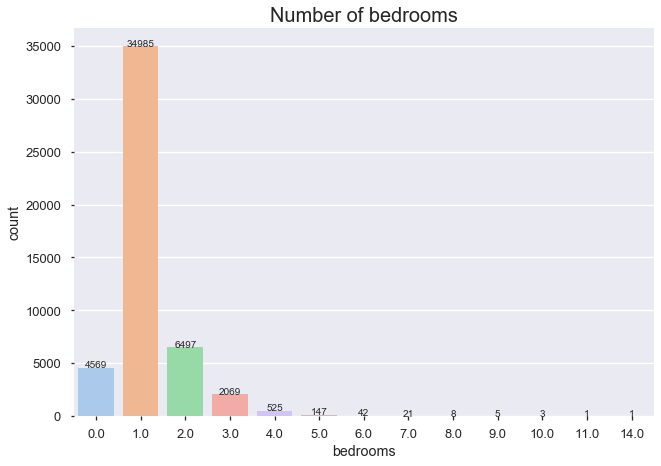

In [0]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
ax=sns.countplot(listings_v1['bedrooms'], palette = 'pastel')
plt.title('Number of bedrooms', fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 5,'{:1}'.format(height),ha="center") 
plt.show()

In [0]:
# Joining Zillow dataset and AirBnB listings dataset on zipcodes
merged_data_v1=pd.merge(zillow_v2, listings_v1, how='inner', left_on='RegionName', right_on='zipcode')

In [0]:
merged_data_v1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Median-1996,Median-1997,Median-1998,Median-1999,Median-2000,Median-2001,Median-2002,Median-2003,Median-2004,Median-2005,Median-2006,Median-2007,Median-2008,Median-2009,Median-2010,Median-2011,Median-2012,Median-2013,Median-2014,Median-2015,Median-2016,Median-2017,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0,5203,https://www.airbnb.com/rooms/5203,20190708031610,2019-07-08,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,"Because we are an active family, I guarantee t...",The number 1 train stops at 110th Street/Cathe...,Guests will be able to come and go as they nee...,My modern family is super busy with lots of co...,"No smoking. In fact, there is no smoking anywh...",NaN,NaN,https://a0.muscache.com/im/pictures/103776/b37...,NaN,7490,https://www.airbnb.com/users/show/7490,MaryEllen,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/7490/profile_...,https://a0.muscache.com/im/users/7490/profile_...,Upper West Side,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"New York, NY, United States",Upper West Side,Upper West Side,Manhattan,New York,NY,10025,New York,"New York, NY",US,United States,40.80178,-73.96723,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",NaN,$79.00,NaN,NaN,NaN,NaN,1,$0.00,2,14,2,2,14,14,2.0,14.0,24 months ago,t,0,0,0,0,2019-07-08,118,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,flexible,t,t,1,0,1,0,0.99
1,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0,5295,https://www.airbnb.com/rooms/5295,20190708031610,2019-07-08,Beautiful 1br on Upper West Side,NaN,Beautiful 1br

In [0]:
merged_data_v2=merged_data_v1[(merged_data_v1['bedrooms']==2.0)]
merged_data_v2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Median-1996,Median-1997,Median-1998,Median-1999,Median-2000,Median-2001,Median-2002,Median-2003,Median-2004,Median-2005,Median-2006,Median-2007,Median-2008,Median-2009,Median-2010,Median-2011,Median-2012,Median-2013,Median-2014,Median-2015,Median-2016,Median-2017,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0,145994,https://www.airbnb.com/rooms/145994,20190708031610,2019-07-08,Cozy 2 Bedroom with Private Garden,"My place is good for couples, small families, ...","Apt includes: 2 bedroom 1 bathroom Kitchen, li...","My place is good for couples, small families, ...",none,Quiet. Safe.,NaN,Express train,All rooms,As much as needed by phone.,- No patio use after 10pm EST.,NaN,NaN,https://a0.muscache.com/im/pictures/a978f1d1-6...,NaN,706418,https://www.airbnb.com/users/show/706418,Carolyn,2011-06-15,"New York, New York, United States",NaN,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/cd93a30b-5...,https://a0.muscache.com/im/pictures/cd93a30b-5...,Upper West Side,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'kba']",t,t,"New York, NY, United States",Upper West Side,Upper West Side,Manhattan,New York,NY,10025,New York,"New York, NY",US,United States,40.79264,-73.97294,t,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,Heating,""Family/kid friendly""...",NaN,$95.00,NaN,NaN,$350.00,$100.00,1,$0.00,5,14,5,5,14,14,5.0,14.0,5 weeks ago,t,0,0,0,0,2019-07-08,2,0,2017-07-11,2018-07-06,90.0,8.0,9.0,8.0,10.0,9.0,8.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.08
9,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0,148825,https://www.airbnb.com/rooms/148825,20190708031610,2019-07-08,Best City Area Columbia U Upper West Side C Park,Close to Columbia / C Park and everything else...,UWS Apt. with use of ONE Bike included! Kitch...,Close to Columbia / C Park and everything else...,none,This dynamic neighborhood is equidistant to Ce...,L